This model was developed by Permamodel workgroup.

Basic theory is Kudryavtsev's method.

Reference:

        Anisimov, O. A., Shiklomanov, N. I., & Nelson, F. E. (1997).
        Global warming and active-layer thickness: results from transient general circulation models.
        Global and Planetary Change, 15(3), 61-77.

In [1]:
import os,sys

sys.path.append('../../permamodel/')

from permamodel.components import bmi_Ku_component
from permamodel import examples_directory
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, addcyclic
import matplotlib as mpl

print examples_directory

cfg_file = os.path.join(examples_directory, 'Ku_method_2D.cfg')
x = bmi_Ku_component.BmiKuMethod()

x.initialize(cfg_file)
x.update()
x.finalize()

ALT = x.get_value('soil__active_layer_thickness')[0]
TTOP = x.get_value('soil__temperature')[0]
LAT = x.get_value('latitude')
LON = x.get_value('longitude')
SND = x.get_value('snowpack__depth')[0]

MASK0 = SND
MASK = MASK0
MASK[np.where(MASK0>0)] = 1.0;
MASK[np.where(MASK0==0)] = np.nan;

ALT = ALT * MASK
TTOP = TTOP*MASK

LONS, LATS = np.meshgrid(LON, LAT)


../../permamodel/permamodel/examples
 
Ku model component: Initializing...
Permafrost component: Finished.


Spatially visualize active layer thickness:

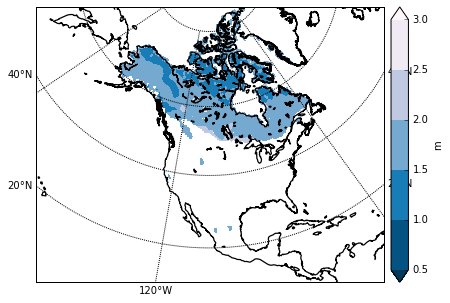

Simulated ALT:
Max: 5.56056964671 m 75% =  2.0
Min: 0.98826425804 m 25% =  1.44765661811


(array([  1.95700000e+03,   3.46400000e+03,   2.41300000e+03,
          3.30000000e+01,   2.10000000e+01,   6.00000000e+00,
          1.00000000e+01,   5.00000000e+00,   3.00000000e+00,
          4.00000000e+00]),
 array([ 0.98826426,  1.4454948 ,  1.90272534,  2.35995587,  2.81718641,
         3.27441695,  3.73164749,  4.18887803,  4.64610857,  5.10333911,
         5.56056965]),
 <a list of 10 Patch objects>)

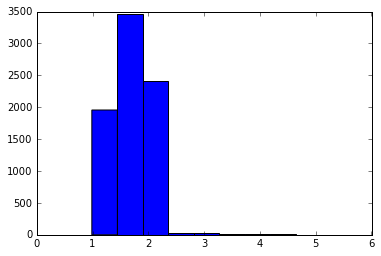

In [2]:
fig=plt.figure(figsize=(8,4.5))

ax = fig.add_axes([0.05,0.05,0.9,0.85])

m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax)

X, Y = m(LONS, LATS)

m.drawcoastlines(linewidth=1.25)
# m.fillcontinents(color='0.8')
m.drawparallels(np.arange(-80,81,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(0,360,60),labels=[0,0,0,1])

clev = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
cs = m.contourf(X, Y, ALT, clev, cmap=plt.cm.PuBu_r, extend='both')

cbar = m.colorbar(cs)
cbar.set_label('m')

plt.show()

# print x._values["ALT"][:]
ALT2 = np.reshape(ALT, np.size(ALT))
ALT2 = ALT2[np.where(~np.isnan(ALT2))]

print 'Simulated ALT:'
print 'Max:', np.nanmax(ALT2),'m', '75% = ', np.percentile(ALT2, 75)
print 'Min:', np.nanmin(ALT2),'m', '25% = ', np.percentile(ALT2, 25)

plt.hist(ALT2)

Spatially visualize mean annual ground temperature:

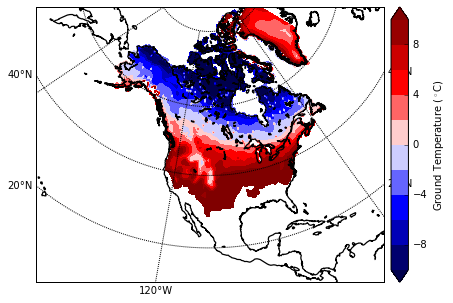

(array([  385.,   831.,  1059.,  2014.,  2499.,  2041.,  2507.,  1654.,
          722.,   295.]),
 array([-21.00475474, -17.00300459, -13.00125444,  -8.99950429,
         -4.99775414,  -0.99600399,   3.00574616,   7.00749631,
         11.00924646,  15.01099661,  19.01274676]),
 <a list of 10 Patch objects>)

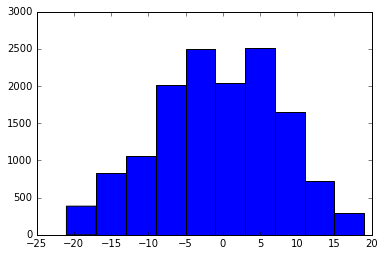

In [3]:
fig2=plt.figure(figsize=(8,4.5))

ax2 = fig2.add_axes([0.05,0.05,0.9,0.85])

m2 = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax2)

X, Y = m2(LONS, LATS)

m2.drawcoastlines(linewidth=1.25)
# m.fillcontinents(color='0.8')
m2.drawparallels(np.arange(-80,81,20),labels=[1,1,0,0])
m2.drawmeridians(np.arange(0,360,60),labels=[0,0,0,1])

clev = np.linspace(start=-10, stop=10, num =11)
cs2 = m2.contourf(X, Y, TTOP, clev, cmap=plt.cm.seismic, extend='both')

cbar2 = m2.colorbar(cs2)
cbar2.set_label('Ground Temperature ($^\circ$C)')

plt.show()

# # print x._values["ALT"][:]
TTOP2 = np.reshape(TTOP, np.size(TTOP))
TTOP2 = TTOP2[np.where(~np.isnan(TTOP2))]

# Hist plot:
plt.hist(TTOP2)